### DAT 341: Assignment 4 (2024)


**Instructions**

Add the following information to your notebook name before you submit:

*  Your Student number

*  Your Surname

*  Your Initials

Please complete all the questions below on this Google Notebook.

Add code cells as needed.

**Make use of comments within your coding cells to document your code at each step (#).**

After completion, download the ipynb file and submit it using the assignment link on SunLearn.

Submission deadline: 27 October 2024, before 20:00

(48 marks in total)

In [ ]:
 #23563036 M.Badrodin (Muktaar Badrodin)

In [2]:
from datascience import *
import numpy as np
from google.colab import files
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

**Question:**

You are a food safety analyst working for a regulatory agency responsible for setting standards on pesticide residues in strawberries. You want to assess the pesticide residue levels in strawberries and determine if the residue levels comply with the Maximum Residue Level (MRL) set for fruits intended for juice by the regulatory authority for a small-scale producer, Zepplins.

In [3]:
# upload file
uploaded = files.upload()

Saving strawberry_pesticide_residue.csv to strawberry_pesticide_residue.csv


a) You selected a random sample of 100 strawberry plants from the producer and determine the pesticide residue levels for each of the plants. Note, the data ***strawberry_pesticide_residue.csv*** provides the dataset for the pesticide residuals of all of Zepplins strawberry plants. Write the code to select the sample’s data from the provided data and store this in a new table called ***first_sample*** (3 marks).

In [4]:
#read file into table
strawberry_pesticide_residue = Table.read_table('strawberry_pesticide_residue.csv')
strawberry_pesticide_residue


PesticideResidue
2.74507
1.7926
2.97153
4.28454
1.64877
1.64879
4.36882
3.15115
1.29579
2.81384


In [ ]:
#selecting a random sample of 100 strawberry plants
first_sample = strawberry_pesticide_residue.sample(100,with_replacement=False)
first_sample

PesticideResidue
1.60002
0.829674
4.17023
0.186013
5.10234
2.54368
0.829935
1.25271
3.09977
2.83341


In [ ]:
#seeing all 100 samples
first_sample.show(100)

PesticideResidue
1.60002
0.829674
4.17023
0.186013
5.10234
2.54368
0.829935
1.25271
3.09977
2.83341


b)  You need to decide whether to make use of the means of the data (if the data distribution is symmetrical with no extreme outliers) or the median of the data (if the data distribution is skewed) as a metrics to evaluate the residue levels. To do so, write the code to look at your sample’s distribution (1 mark).

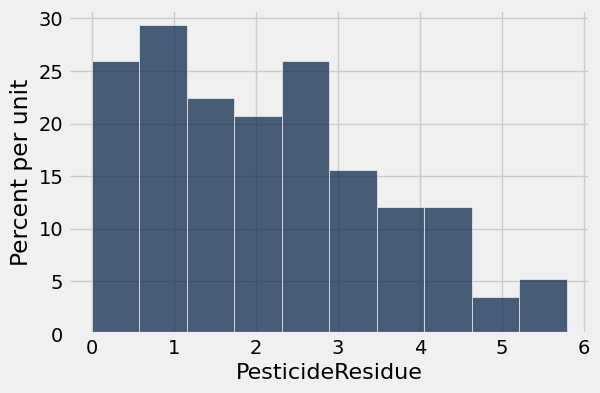

In [ ]:
#Deciding to use the mean or median depending if the sample distribution is skewed or symmetrical
#Do this with the use of a histogram.
first_sample.hist('PesticideResidue')


c) What metrics will you use and why (2 marks)?

*Write your answer here.*

In [ ]:
#Answer in textbox below

#Since we do not see a normal distribution, the data is skewed ths the medians of the data will be the metrics in order to evaluate the residue levels.
#The reason for this is because a non-normal distribution that has outliers , the mean will be skewed hence will not be feasible to evaluate residue levels. Thus the median will be used for evaluation of residual levels.

Since we do not see a normal distribution, the data is skewed ths the medians of the data will be the metrics in order to evaluate the residue levels. The reason for this is because a non-normal distribution that has outliers , the mean will be skewed hence will not be feasible to evaluate residue levels. Thus the median will be used for evaluation of residue levels.


d) You want to apply bootstrapping to estimate the pesticide residue level in the strawberries. To facilitate this, create a function, called ***bootstraps***, that take two inputs, namely, a table of the sample population’s data and the column header of the residue values. The function should calculate 10,000 bootstrapped statistic values, either means or medians, depending on your answer in (c) above, and finally return a table of these values (7 marks).

In [ ]:
def bootstraps(table,column_header):
  bootstrapped_values=make_array()
  for i in np.arange(10000):
    resample=table.sample()
    statista=np.median(resample.column(column_header))
    bootstrapped_values=np.append(bootstrapped_values,statista)
  return Table().with_column('Bootstrapped Statistic',bootstrapped_values)

e) Calculate and display the 95% confidence interval for the estimated residue level statistic (mean or median) of your sample, after applying the bootstrap-function generated in (d) above (4 marks).

In [ ]:
#bootstraps(first_sample,'PesticideResidue') #testing if the function works

Bootstrapped Statistic
2.09121
1.96062
2.04023
1.78993
1.96062
1.74642
1.8018
1.725
1.89555
2.39716


In [9]:
# create a function to perform a single bootstrap
def one_bootstrap():
  resamplex=strawberry_pesticide_residue.sample(100,with_replacement=True)
  newMedian=np.median(resamplex.column('PesticideResidue'))
  return newMedian    #returns the median for the resampled sample

In [ ]:
one_bootstrap()

2.31189896412068

In [10]:
# perform 10000 bootraps
#create an array to store bootstrap averages
bootstrap_medians=[]
for i in np.arange(10000):
  new_bootstrap_median=one_bootstrap()  #calculate new bootstrapped median
  bootstrap_medians.append(new_bootstrap_median)

In [14]:
# A table was created
bootstrap_medians_table=Table().with_column('bootstrap_medians',bootstrap_medians)
bootstrap_medians_table

bootstrap_medians
2.15625
2.02566
1.88788
2.0572
2.42511
2.0421
1.82383
1.74913
2.14623
1.77869


In [11]:
#Get the middle of 95% of the data
#Our confidence interval is 95%
left_marg=percentile(2.5,bootstrap_medians)
right_marg=percentile(97.5,bootstrap_medians)
left_marg,right_marg

(1.6377799235152042, 2.3668761626139547)

In [6]:
#This code block is in order to work out the population median
population_median=np.median(strawberry_pesticide_residue.column('PesticideResidue'))
population_median

2.0115508148728933

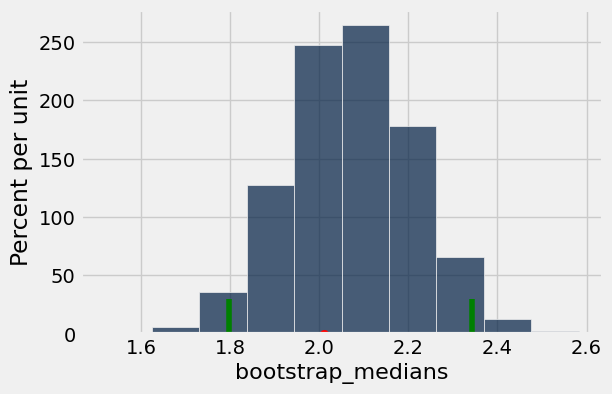

In [ ]:
#The confidence level was than draw on to the graph
bootstrap_medians_table.hist()
plots.scatter(population_median,0,color='red')
plots.plot([left_marg,left_marg],[0,0.3],color='green')
plots.plot([right_marg,right_marg],[0,0.3],color='green')

f) Display your calculated confidence interval in a figure along with the distribution of the residue level values of all the strawberry plants and the statistic (mean or median) calculated for all the strawberries (5 marks).

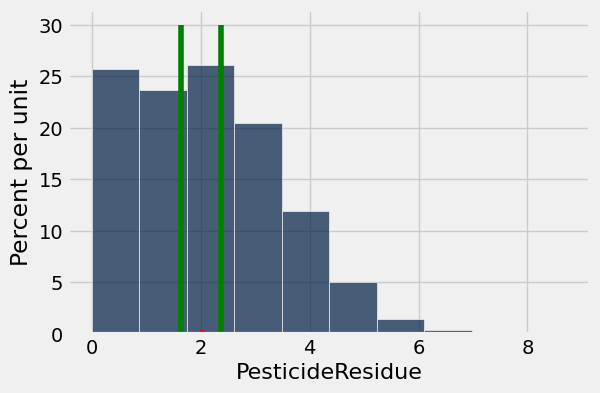

In [12]:
#The confidence level was than draw on to the graph
strawberry_pesticide_residue.hist()
plots.scatter(population_median,0,color='red')
plots.plot([left_marg,left_marg],[0,0.3],color='green')
plots.plot([right_marg,right_marg],[0,0.3],color='green')

In [ ]:
#This code block is in order to work out the population median
population_median=np.median(strawberry_pesticide_residue.column('PesticideResidue'))
population_median

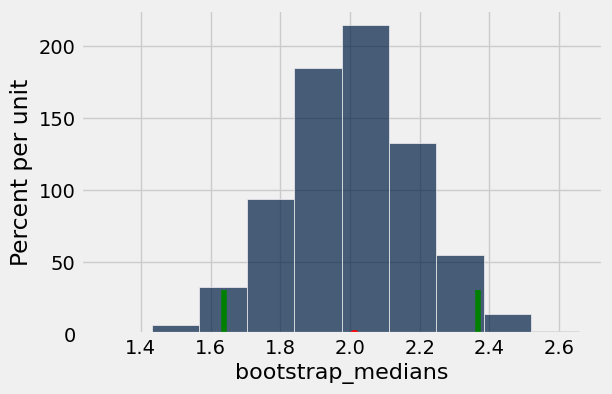

In [15]:
#The confidence level was than draw on to the graph
bootstrap_medians_table.hist()
plots.scatter(population_median,0,color='red')
plots.plot([left_marg,left_marg],[0,0.3],color='green')
plots.plot([right_marg,right_marg],[0,0.3],color='green')

g) Perform bootstrapping analysis on an additional 50 samples by taking a new random sample of 100 plants (from the complete population dataset) 50 times, perform bootstrapping on each new sample using your function created in (d) above, and saving all calculated interval margins in a table called ***interval***, with the columns ***left*** and ***right*** (8 marks).

In [ ]:
#First I want to store the margins of the samples in empty arrays
left_margins = []
right_margins = []

#Now I want to perform analysis based on 50 samples
for i in range(50):
    new_sample = strawberry_pesticide_residue.sample(100, with_replacement=False)   #This is from the dataset
    bootstrapped_table = bootstraps(new_sample, 'PesticideResidue')   #function from d) used here
    bootstrapped_values = bootstrapped_table.column('Bootstrapped Statistic')

    left_margin = np.percentile(bootstrapped_values, 2.5)
    right_margin = np.percentile(bootstrapped_values, 97.5)  #made use of np.percentile to work out the left and right margins.
    left_margins.append(left_margin)
    right_margins.append(right_margin)   #than I appended it

In [ ]:
# A table was than generated as instructed.
interval = Table().with_columns(
    'left', left_margins,
    'right', right_margins
)
interval

left,right
1.59862,2.39618
1.87727,2.69671
2.04543,2.60486
1.75831,2.22745
2.04228,2.6031
1.69848,2.54684
1.36208,2.04768
1.72398,2.32606
1.853,2.38333
1.46907,2.33999


h) Create a function, called ***betw***, that takes two margins as input, and then determines whether the calculated statistic (average of median) for all strawberry plants falls within the interval. The function should return either ***yes*** or ***no*** (4 marks).

In [ ]:
#A median for all strawberry plants was calculated. Note this was the same as the code previously done before
population_median=np.median(strawberry_pesticide_residue.column('PesticideResidue'))
population_median

2.0115508148728933

In [ ]:
# The function was defined and if the population median falls between the left and right than it is within the interval (thus returning yes).
#If it is not within the interval, it will return no.
def betw(left,right):
  if left <= population_median <= right:
    return 'yes'
  else:
    return 'no'

i) Make use of the function ***betw*** to determine whether the calculated statistic for all the strawberry plants fall within the intervals calculated in (g) above. Add the answers to the table then calculate what percentage of the 50 intervals spanned the calculated statistic for all the strawberry plants (5 marks).

In [ ]:
#Create an empty array
within_interval=[]
for i in range(len(interval.column("left"))):
  leftMargin=interval.column('left')[i]
  rightMargin=interval.column('right')[i]
  answer=betw(leftMargin,rightMargin)
  within_interval.append(answer)   #Do not forget to append

In [ ]:
interval=interval.with_column('within_interval',within_interval)
interval

left,right,within_interval
1.59862,2.39618,yes
1.87727,2.69671,yes
2.04543,2.60486,no
1.75831,2.22745,yes
2.04228,2.6031,no
1.69848,2.54684,yes
1.36208,2.04768,yes
1.72398,2.32606,yes
1.853,2.38333,yes
1.46907,2.33999,yes


In [ ]:
#caculating how many yes there are
how_many_yes=interval.where('within_interval','yes').num_rows
how_many_yes

44

In [ ]:
how_many_yes/50*100  #calculating the percentage of yes

88.0

j) Complete the following code to display the 50 calculated confidence intervals, above each-other, in a single figure along with the distribution of the residue level values of all the strawberry plants and the statistic (mean or median) value calculated for all these plants. To do so replace all *** in the code below with the correct code, keeping all the other code as is (7 marks).

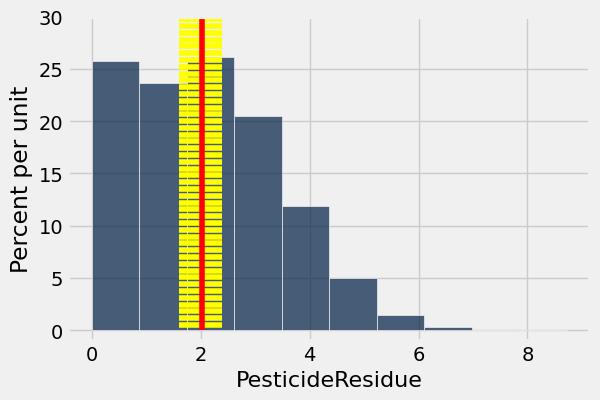

In [ ]:
# plot with respect to the total population
strawberry_pesticide_residue.hist('PesticideResidue')
plots.ylim(-0.01,0.3)

table_with_intervals = interval
number_of_intervals = table_with_intervals.num_rows
population_satistic = np.median(strawberry_pesticide_residue.column('PesticideResidue'))

counter = 0.005
for ii in np.arange(number_of_intervals):
  # draw the confidence level on the graph

  plots.plot(make_array(table_with_intervals.row(0).item(0),table_with_intervals.row(0).item(1)),
             make_array(counter,counter),color='yellow')
  counter += 0.0065

plots.plot(make_array(population_satistic,population_satistic),
           make_array(0,0.3),color='red')

k) Discuss what you can learn from the answer generated in (i) and the figure generated in (j) above (2 marks).

*Write your answer here.*

In [ ]:
#Answer in textbox below

#One can see that 88% of the intervals contain the population median thus suggesting that the intervals represent the population medians very well and that the method employed to estimate the median is very reliable.

#In the figure above, one can see the yellow interval alignments supports the consistency of the bootstrapped intervals with the population median (as shown with the red line).
#Bootstrapping is thus effective in estimating this dataset and is suitable for understanding the central tendency of the pestice residue in strawberry plants.

One can see that 88% of the intervals contain the population median thus suggesting that the intervals represent the population medians very well and that the method employed to estimate the median is very reliable.

In the figure above, one can see the yellow interval alignments supports the consistency of the bootstrapped intervals with the population median (as shown with the red line). Bootstrapping is thus effective in estimating this dataset and is suitable for understanding the central tendency of the pestice residue in strawberry plants.